In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
from subprocess import check_call

%matplotlib inline

In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.describe(include="all")

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885.0,12043,12043,12043,12043,7717,883.0,12043,...,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3.0,100,1,100,6,5725,NaN,80,...,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,...,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,1aed7ebd3dc14fdd87abb2d5326edbca,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883.0,578,12043,578,3934,14,NaN,746,...,NaN,255,2169,10,NaN,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [4]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("account").mean()
print("Mean Values Indexed by account")
df_salaries.head()

Mean Values Indexed by account


,card_present_flag,merchant_code,balance,age,amount
account,,,,,
ACC-1037050564,NaN,0.0,3959.400000,40,892.09
ACC-1056639002,NaN,0.0,49718.081667,22,3195.01
ACC-1199531521,NaN,0.0,12414.007143,52,3785.78
ACC-1217063613,NaN,0.0,6884.815000,27,4863.62
ACC-1222300524,NaN,0.0,1755.892308,38,1002.13


In [5]:
salaries = []

for account in df["account"]:
    salaries.append(int(df_salaries.loc[account]["amount"]))
    
df["pay"] = salaries
df_acc = df.groupby("account").mean()

#print("Added Column of pay Indexed by account")

In [6]:
df_salaries_sum = df[df["txn_description"]=="PAY/SALARY"].groupby("account").sum()
#print("Sum Values Indexed by account")
#df_salaries_sum.head()

In [7]:
pay_count = []

for account in df["account"]:
    pay_count.append(int(int(df_salaries_sum.loc[account]["amount"]) / int(df_salaries.loc[account]["amount"])))

df["pay_count"] = pay_count
df_acc = df.groupby("account").mean()

print("Added Column of pay and pay_count Indexed by account")

df_acc.head()

Added Column of pay and pay_count Indexed by account


,card_present_flag,merchant_code,balance,age,amount,pay,pay_count
account,,,,,,,
ACC-1037050564,0.827273,0.0,3331.424479,40,74.465019,892,13
ACC-1056639002,0.775862,0.0,46338.733837,22,265.134767,3195,6
ACC-1199531521,0.744186,0.0,10162.788961,52,418.742468,3785,7
ACC-1217063613,0.785714,0.0,4513.148800,27,426.108800,4863,2
ACC-1222300524,0.818841,0.0,1191.291419,38,78.206106,1002,13


In [8]:
df_acc.max()

card_present_flag         1.000000
merchant_code             0.000000
balance              263753.766119
age                      78.000000
amount                  693.632903
pay                    8835.000000
pay_count                14.000000
dtype: float64

Text(0, 0.5, 'Number of Customers')

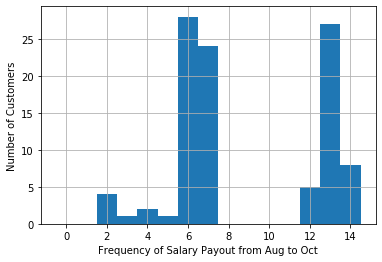

In [9]:
df_acc.pay_count.hist(bins = 15, range = (0,15), align = 'left')
plt.xlabel("Frequency of Salary Payout from Aug to Oct")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

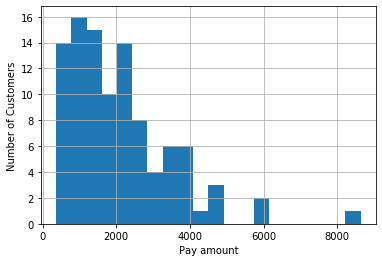

In [10]:
df_acc.pay.hist(bins = 20, align = 'left')
plt.xlabel("Pay amount")
plt.ylabel("Number of Customers")

In [11]:
df_acc["annual_salary"] = 0
for i in range(0,len(df_acc.pay_count)):
    #weekly pay
    if df_acc["pay_count"][i] >=12:
        df_acc["annual_salary"][i] = df_acc["pay"][i] / 7 *365.25 
    #monthly pay
    elif df_acc["pay_count"][i] <=5:
        df_acc["annual_salary"][i] = df_acc["pay"][i] * 12 
    #fortnightly pay
    else:
        df_acc["annual_salary"][i] = df_acc["pay"][i] / 14 *365.25
        
df_acc.head()    


C:\Users\rajesh jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rajesh jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\rajesh jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,card_present_flag,merchant_code,balance,age,amount,pay,pay_count,annual_salary
account,,,,,,,,
ACC-1037050564,0.827273,0.0,3331.424479,40,74.465019,892,13,46543
ACC-1056639002,0.775862,0.0,46338.733837,22,265.134767,3195,6,83355
ACC-1199531521,0.744186,0.0,10162.788961,52,418.742468,3785,7,98747
ACC-1217063613,0.785714,0.0,4513.148800,27,426.108800,4863,2,58356
ACC-1222300524,0.818841,0.0,1191.291419,38,78.206106,1002,13,52282


In [12]:
"""
salary_trans = df[df['txn_description']=='PAY/SALARY']
pos_pos_sales = df[(df['txn_description']=='POS') | (df['txn_description']=='SALES-POS')]

customers=group_by_data(salary_trans,['account'])
df_acc["annual_balance"] = 0
#annual_balance=[]
for i in range(0,len(df_acc.pay_count)):
#for i in customers['account'].values:
    #print(i)
    salary_for_user=salary_trans[salary_trans['account']==i]
    
   
    annual_balance.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['balance'].values.sum())
annual_balance=np.array(annual_balance).reshape(-1,1) 
"""

'\nsalary_trans = df[df[\'txn_description\']==\'PAY/SALARY\']\npos_pos_sales = df[(df[\'txn_description\']==\'POS\') | (df[\'txn_description\']==\'SALES-POS\')]\n\ncustomers=group_by_data(salary_trans,[\'account\'])\ndf_acc["annual_balance"] = 0\n#annual_balance=[]\nfor i in range(0,len(df_acc.pay_count)):\n#for i in customers[\'account\'].values:\n    #print(i)\n    salary_for_user=salary_trans[salary_trans[\'account\']==i]\n    \n   \n    annual_balance.append(salary_for_user[[\'amount\',\'age\',\'customer_id\',\'first_name\',\'date\',\'balance\']][\'balance\'].values.sum())\nannual_balance=np.array(annual_balance).reshape(-1,1) \n'

In [13]:
# obtain other debit transaction and store in previous data frame
for txn in df.txn_description.unique():
    if txn != 'PAY/SALARY':
        df_T = df.loc[df['txn_description'] == txn]
        df_acc[txn] = df_T.amount.groupby(df_T.account.values).sum()
df_acc.fillna(0, inplace=True)

# feature engineering of debit attribute
df_acc['spendings'] = df_acc['POS']+ df_acc['SALES-POS']+df_acc['PAYMENT']+df_acc['INTER BANK']+df_acc['PHONE BANK']
df_acc['age'] = df.age.groupby(df.account.values).mean()

df_acc.head()

,card_present_flag,merchant_code,balance,age,amount,pay,pay_count,annual_salary,POS,SALES-POS,PAYMENT,INTER BANK,PHONE BANK,spendings
account,,,,,,,,,,,,,,
ACC-1037050564,0.827273,0.0,3331.424479,40,74.465019,892,13,46543,3399.41,3445.86,844.0,0.0,0.0,7689.27
ACC-1056639002,0.775862,0.0,46338.733837,22,265.134767,3195,6,83355,675.54,1299.99,747.0,909.0,0.0,3631.53
ACC-1199531521,0.744186,0.0,10162.788961,52,418.742468,3785,7,98747,1085.93,598.78,2883.0,1175.0,0.0,5742.71
ACC-1217063613,0.785714,0.0,4513.148800,27,426.108800,4863,2,58356,220.63,91.85,338.0,275.0,0.0,925.48
ACC-1222300524,0.818841,0.0,1191.291419,38,78.206106,1002,13,52282,6636.13,3049.63,983.0,0.0,0.0,10668.76


In [14]:
df_intermediate = df[['account','gender']]
indexNames = df_intermediate[df_intermediate['account'] == 'ACC-2901672282'].index
df_intermediate.drop(indexNames , inplace=True)
#df_intermediate.head()

df_Corr = df_intermediate.join(df_acc, on='account')
print(df_Corr.shape)
df_Corr.head()

(11920, 16)


C:\Users\rajesh jain\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,account,gender,card_present_flag,merchant_code,balance,age,amount,pay,pay_count,annual_salary,POS,SALES-POS,PAYMENT,INTER BANK,PHONE BANK,spendings
0,ACC-1598451071,F,0.790960,0.0,1735.120675,26,45.348772,1013,14,52856,4830.97,4988.24,1665.0,536.0,0.0,12020.21
1,ACC-1598451071,F,0.790960,0.0,1735.120675,26,45.348772,1013,14,52856,4830.97,4988.24,1665.0,536.0,0.0,12020.21
2,ACC-1222300524,M,0.818841,0.0,1191.291419,38,78.206106,1002,13,52282,6636.13,3049.63,983.0,0.0,0.0,10668.76
3,ACC-1037050564,F,0.827273,0.0,3331.424479,40,74.465019,892,13,46543,3399.41,3445.86,844.0,0.0,0.0,7689.27
4,ACC-1598451071,F,0.790960,0.0,1735.120675,26,45.348772,1013,14,52856,4830.97,4988.24,1665.0,536.0,0.0,12020.21


In [15]:
df_Corr = df_Corr.drop(columns=['card_present_flag','merchant_code','account', 'POS', 'pay_count','PAYMENT', 'SALES-POS', 'PHONE BANK', 'INTER BANK', 'pay'])
df_Corr.head() 

,gender,balance,age,amount,annual_salary,spendings
0,F,1735.120675,26,45.348772,52856,12020.21
1,F,1735.120675,26,45.348772,52856,12020.21
2,M,1191.291419,38,78.206106,52282,10668.76
3,F,3331.424479,40,74.465019,46543,7689.27
4,F,1735.120675,26,45.348772,52856,12020.21


In [16]:
#the dataframe that we will use to predict annual salary
df_Corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11920 entries, 0 to 12042
Data columns (total 6 columns):
gender           11920 non-null object
balance          11920 non-null float64
age              11920 non-null int64
amount           11920 non-null float64
annual_salary    11920 non-null int64
spendings        11920 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 651.9+ KB


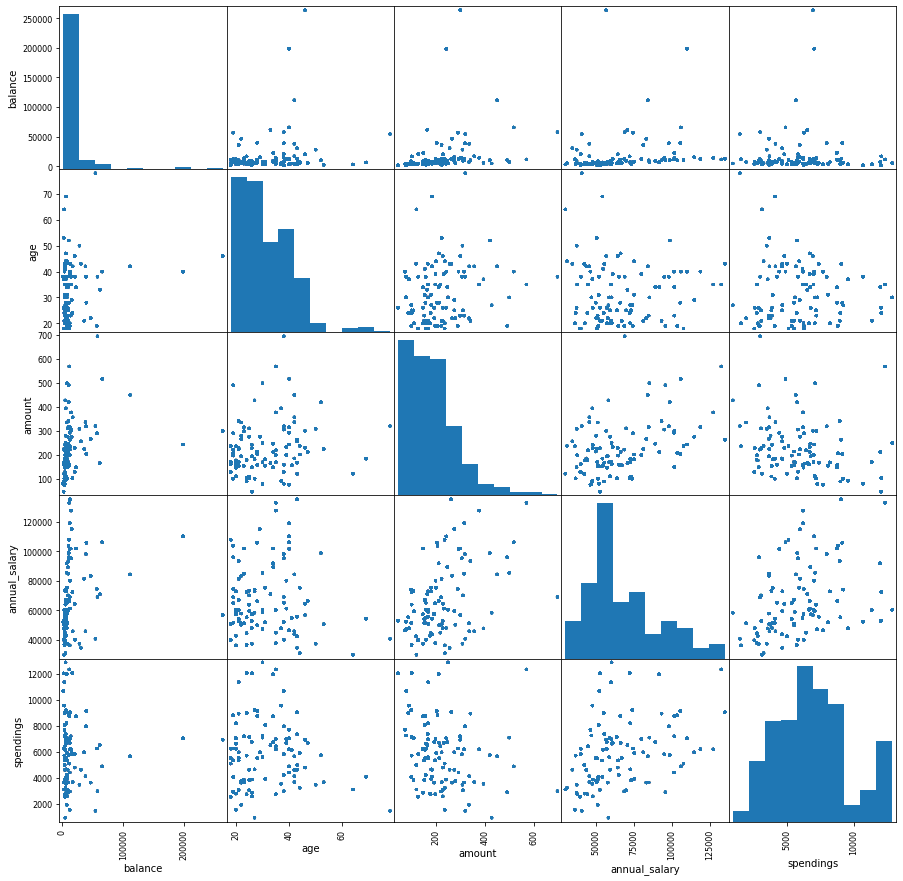

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_Corr,figsize=(15, 15))
plt.show()

In [18]:
y = df_Corr['annual_salary']
x = df_Corr.drop(columns=['annual_salary'], axis = 1)
# Create correlation matrix
corr_matrix = df_Corr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
"""
# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# corr_matrix.to_csv('corr_matrix.csv')
# upper.to_csv('upper.csv')
print('Features with correlation higher than 80% :', len(to_drop))
to_drop
"""

"\n# Find index of feature columns with correlation greater than 0.8\nto_drop = [column for column in upper.columns if any(upper[column] > 0.8)]\n\n# corr_matrix.to_csv('corr_matrix.csv')\n# upper.to_csv('upper.csv')\nprint('Features with correlation higher than 80% :', len(to_drop))\nto_drop\n"

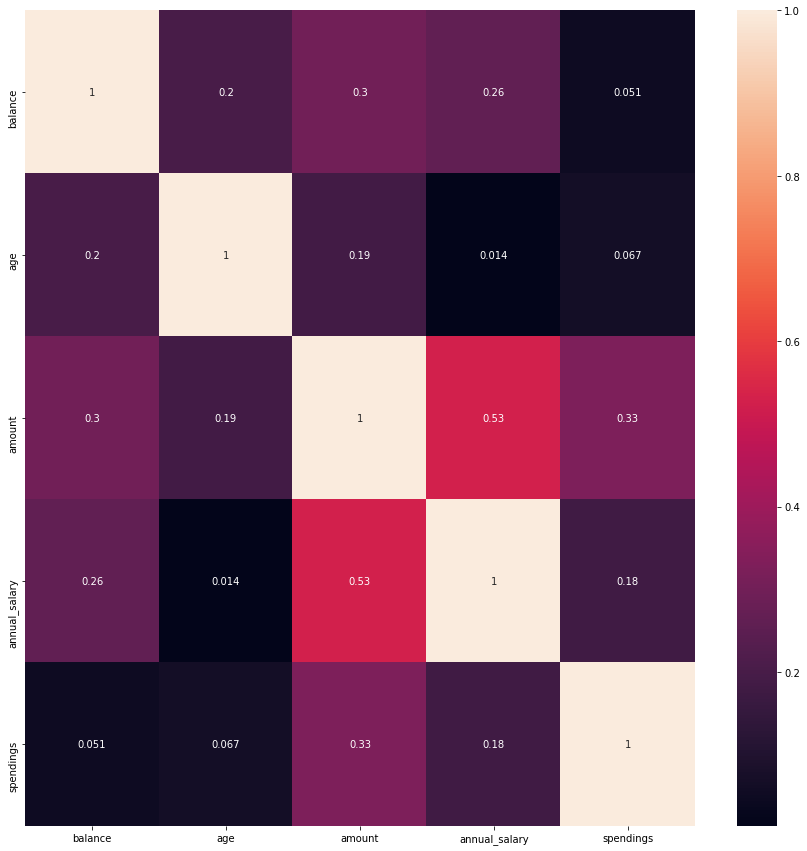

In [19]:
# plot the heatmap

fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr_matrix, annot = True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, ax = ax)

Text(0, 0.5, 'Annual Salary')

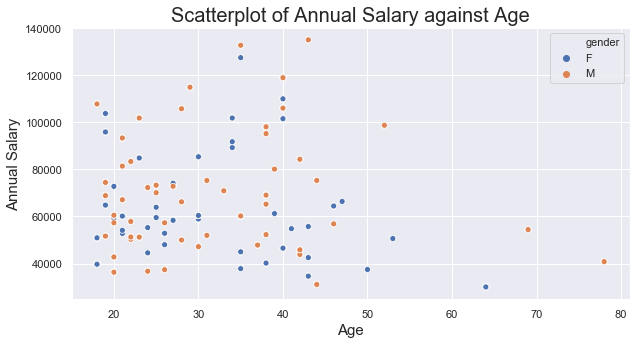

In [20]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
age_salary_graph = sns.scatterplot(x="age", y="annual_salary", hue = 'gender', data=df_Corr)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Age",fontsize=20)
age_salary_graph.set_xlabel("Age", fontsize=15)
age_salary_graph.set_ylabel("Annual Salary", fontsize=15)

In [21]:
df_Corr.head()

,gender,balance,age,amount,annual_salary,spendings
0,F,1735.120675,26,45.348772,52856,12020.21
1,F,1735.120675,26,45.348772,52856,12020.21
2,M,1191.291419,38,78.206106,52282,10668.76
3,F,3331.424479,40,74.465019,46543,7689.27
4,F,1735.120675,26,45.348772,52856,12020.21


In [22]:
annual_salary_series = df_Corr.get('annual_salary')
annual_salary_series = np.array(annual_salary_series).reshape(-1,1)
scaled_annual_salary=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_salary_series)
for i in annual_salary_series:
    scaled_annual_salary.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_salary)
scaled_annual_salary=np.array(scaled_annual_salary).reshape(-1,1)
df_Corr['scaled_annual_salary'] = scaled_annual_salary 


balance_series = df_Corr.get('balance')
balance_series = np.array(balance_series).reshape(-1,1)
scaled_balance=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(balance_series)
for i in balance_series:
    scaled_balance.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_balance)
scaled_balance=np.array(scaled_balance).reshape(-1,1)
df_Corr['scaled_balance'] = scaled_balance 


spending_series = df_Corr.get('spendings')
spending_series = np.array(spending_series).reshape(-1,1)
scaled_spending=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(spending_series)
for i in spending_series:
    scaled_spending.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_spending)
scaled_spending=np.array(scaled_spending).reshape(-1,1)
df_Corr['scaled_spending'] = scaled_spending 


age_series = df_Corr.get('age')
age_series = np.array(age_series).reshape(-1,1)
scaled_age=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(age_series)
for i in age_series:
    scaled_age.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_spending)
scaled_age=np.array(scaled_age).reshape(-1,1)
df_Corr['scaled_age'] = scaled_age


amount_series = df_Corr.get('amount')
amount_series = np.array(amount_series).reshape(-1,1)
scaled_amount=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(amount_series)
for i in amount_series:
    scaled_amount.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_spending)
scaled_amount=np.array(scaled_amount).reshape(-1,1)
df_Corr['scaled_amount'] = scaled_amount 

C:\Users\rajesh jain\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rajesh jain\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
df_Corr.head()

,gender,balance,age,amount,annual_salary,spendings,scaled_annual_salary,scaled_balance,scaled_spending,scaled_age,scaled_amount
0,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000
1,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000
2,M,1191.291419,38,78.206106,52282,10668.76,21.172750,0.000000,81.600643,33.333333,5.068354
3,F,3331.424479,40,74.465019,46543,7689.27,15.706203,0.815095,56.647209,36.666667,4.491279
4,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000


In [24]:
# SPLITTING OF DATA INTO X & y

In [25]:

X = df_Corr.drop(columns=['scaled_annual_salary', 'scaled_balance', 'scaled_spending', 'scaled_age', 'scaled_amount', 'annual_salary'], axis=1)
#df_Corr = df_Corr.drop(columns=['INTER BANK', 'pay'])
y = df_Corr['annual_salary']

# Checking shape
#X.shape , y.shape

# Converting categorical into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['gender' , 'age']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                remainder='passthrough')

X = transformer.fit_transform(X)
X_lin_train , X_lin_test , y_lin_train , y_lin_test = X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)
#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print("X_test: ", X_test)
#print ("y_test: ", y_test)


In [26]:
#LINEAR REGRESSION

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Setting up random seed
np.random.seed(42)
# Instantiate the model
model_lin = LinearRegression()
# Fit the model
model_lin.fit(X_train , y_train)
# Making predictions
y_lin_preds = model_lin.predict(X_test)
# Model Score 
model_lin.score(X_test , y_test)

# R2 score evaluation on linear reg 
r2_lin = r2_score(y_test , y_lin_preds)
#  Mean absoulte error on linear regression
mae_lin = mean_absolute_error(y_test , y_lin_preds)
# Mean Squared error on linear 
mse_lin = mean_squared_error(y_test , y_lin_preds)

print("r2 score: ",r2_lin)
print("Mean absoulte error: ",mae_lin)
print("Mean Squared error: ",mse_lin)

r2 score:  0.6749799511907143
Mean absoulte error:  10137.387511066627
Mean Squared error:  176699172.45333818


In [28]:
df_abs = pd.DataFrame(data = {'Actual values':y_test ,
                             'Predicted values':y_lin_preds})
df_abs['Differences'] = df_abs['Predicted values'] - df_abs['Actual values']

df_abs.head()

,Actual values,Predicted values,Differences
8457,91756,107472.870769,15716.870769
3414,51656,59362.154032,7706.154032
7606,59379,50759.860068,-8619.139932
2686,80120,74094.625534,-6025.374466
4317,37385,41412.093814,4027.093814


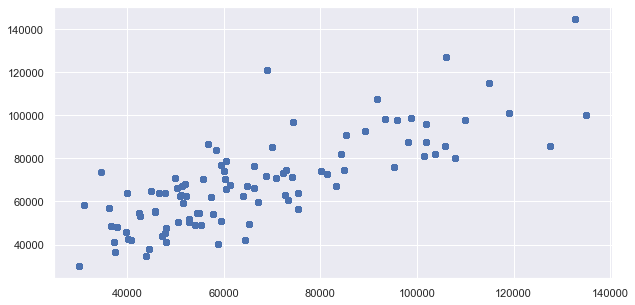

In [29]:
#Visualizing with scatter plot how well our model is doing
plt.scatter(y_test , y_lin_preds)

In [30]:
#DECISION TREE

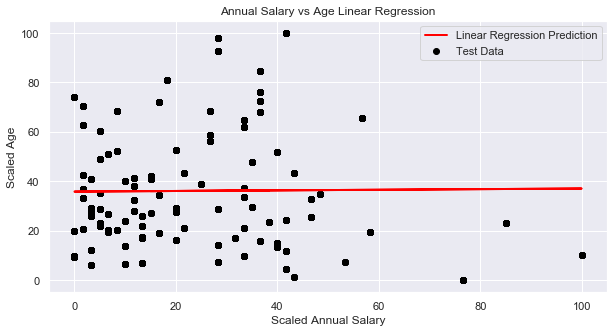

Mean Absolute Error: 17.8
Mean Squared Error: 499.83
Root Mean Squared Error: 22.36


In [31]:
X = np.array(df_Corr.get('scaled_age')).reshape(-1,1)
y = np.array(df_Corr.get('scaled_annual_salary')).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
ax.set_xlabel("Scaled Annual Salary")
ax.set_ylabel("Scaled Age")
ax.set_title('Annual Salary vs Age Linear Regression')
ax.scatter(X_test, y_test,  color='black', marker='o', label='Test Data')
#ax.scatter(X_train, y_train,  color='blue', marker='x', label='Train Data')
ax.plot(X_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
ax.legend(loc='upper right')
plt.show()
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))

#The below plot shows scaled_age is not a good determinant for scaled_annual_salary prediction

In [32]:
def calculate_annual_salary_percentile(annual_salary, annual_salary_list):
    annual_salary_percentiles=np.percentile(annual_salary_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_salary_percentiles):
        if annual_salary>val:
            percentile=i
    annual_salary_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

def calculate_annual_balance_percentile(annual_balance, annual_balance_list):
    annual_balance_percentiles=np.percentile(annual_balance_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_balance_percentiles):
        if annual_balance>val:
            percentile=i
    annual_balance_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

def calculate_annual_spending_percentile(annual_spending, annual_spending_list):
    annual_spending_percentiles=np.percentile(annual_spending_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_spending_percentiles):
        if annual_spending>val:
            percentile=i
    annual_spending_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile


    '''
    These percentiles show what kind of financial decision should the customer make
    
    >80 and <100 high
    >60 and <79 med
    >30 and <59 low
    >0 and <29 extra low
    
    Eg: if annual_spending_percentile = 'high' but annual_salary_percentile = 'low' then he/she should reduce spending
    
    '''


In [33]:
#anz_transactions_pos_pos_sales['AGE_RANGE']=anz_transactions_pos_pos_sales['age'].apply(get_range, args=(age_bins,))
df_Corr['annual_salary_percentile']=df_Corr['scaled_annual_salary'].apply(calculate_annual_salary_percentile, args=(scaled_annual_salary,))
df_Corr['annual_balance_percentile']=df_Corr['scaled_balance'].apply(calculate_annual_balance_percentile, args=(scaled_balance,))
df_Corr['annual_spending_percentile']=df_Corr['scaled_spending'].apply(calculate_annual_spending_percentile, args=(scaled_spending,))

df_Corr.head()

,gender,balance,age,amount,annual_salary,spendings,scaled_annual_salary,scaled_balance,scaled_spending,scaled_age,scaled_amount,annual_salary_percentile,annual_balance_percentile,annual_spending_percentile
0,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000,20,10,90
1,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000,20,10,90
2,M,1191.291419,38,78.206106,52282,10668.76,21.172750,0.000000,81.600643,33.333333,5.068354,20,10,80
3,F,3331.424479,40,74.465019,46543,7689.27,15.706203,0.815095,56.647209,36.666667,4.491279,10,10,60
4,F,1735.120675,26,45.348772,52856,12020.21,21.719500,0.207124,92.919130,13.333333,0.000000,20,10,90


In [34]:
#DECISION TREE
feature_cols=['annual_balance_percentile', 'annual_spending_percentile']
X = df_Corr[feature_cols] # Features
y = df_Corr['annual_salary_percentile'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [35]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)

#check which depth is better for decision tree
for max_depth in range(1, 20):
    model_reg = DecisionTreeRegressor(max_depth=max_depth)
    model_reg.fit(X_train , y_train)
    scores = model_reg.score(X_test , y_test)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.43 (+/- 0.00)
Max depth: 2, Accuracy: 0.57 (+/- 0.00)
Max depth: 3, Accuracy: 0.63 (+/- 0.00)
Max depth: 4, Accuracy: 0.65 (+/- 0.00)
Max depth: 5, Accuracy: 0.68 (+/- 0.00)
Max depth: 6, Accuracy: 0.70 (+/- 0.00)
Max depth: 7, Accuracy: 0.72 (+/- 0.00)
Max depth: 8, Accuracy: 0.74 (+/- 0.00)
Max depth: 9, Accuracy: 0.76 (+/- 0.00)
Max depth: 10, Accuracy: 0.76 (+/- 0.00)
Max depth: 11, Accuracy: 0.76 (+/- 0.00)
Max depth: 12, Accuracy: 0.76 (+/- 0.00)
Max depth: 13, Accuracy: 0.76 (+/- 0.00)
Max depth: 14, Accuracy: 0.76 (+/- 0.00)
Max depth: 15, Accuracy: 0.76 (+/- 0.00)
Max depth: 16, Accuracy: 0.76 (+/- 0.00)
Max depth: 17, Accuracy: 0.76 (+/- 0.00)
Max depth: 18, Accuracy: 0.76 (+/- 0.00)
Max depth: 19, Accuracy: 0.76 (+/- 0.00)


In [36]:
# Instantiate the model
model_reg = DecisionTreeRegressor(max_depth = 9)
model_reg.fit(X_train , y_train)
# Score of the model
model_reg.score(X_test , y_test)
# Make predictions 
y_preds = model_reg.predict(X_test)
# Checking the score 
model_reg.score(X_test , y_test)

0.7588109509796269

In [37]:
# r2 score evalutation on decision tree
r2_dec = r2_score(y_test , y_preds)
# Mean absoulte error on decision tree
mae_dec = mean_absolute_error(y_test , y_preds)
# Mean Squared Error on decision tree 
mse_dec = mean_squared_error(y_test , y_preds)

print("r2 score",r2_dec)
print("Mean absoulte error",mae_dec)
print("Mean Squared Error",mse_dec)

r2 score 0.7588109509796269
Mean absoulte error 8.154801417555058
Mean Squared Error 179.2840661101291


In [38]:
model_reg.get_params()

{'criterion': 'mse',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [39]:
# Creating grid for Decision tree
dec_reg_grid = {'max_depth':[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2) , 
           'min_samples_split':np.arange(2,10,1),
            'max_leaf_nodes':np.arange(2,20,2) }

In [40]:
# Tune Decision Tree Regressor
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

np.random.seed(42)

# Setup random hyperparameter search for Decision Tree Regressor
rs_dec_reg = RandomizedSearchCV(DecisionTreeRegressor(),
                               param_distributions=dec_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_dec_reg.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'max_depth': [None, 3, 5, 10], 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'max_leaf_nodes': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [41]:
# Best parameters 
rs_dec_reg.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 13,
 'max_leaf_nodes': 18,
 'max_depth': 10}

In [42]:
def evaluate_preds(y_true , y_preds):
    '''
    
    Performs evaluation comparison on y_true labels Vs y_pred labels.
    on a regression model.
    '''
    r2score = r2_score(y_test , y_preds)
    mse = mean_squared_error(y_test , y_preds)
    mae= mean_absolute_error(y_test , y_preds)
    metric_dict = {'R2 Score': round(r2score,2),
                   'Mean Squared Error': round(mse,2),
                  'Mean Absolute Error':round(mae,2),
                  }
    print(f'R2 Score:{r2score*100:2f}%')
    print(f'Mean Squared Error:{mse:2f}')
    print(f'Mean Absolute Error:{mae:2f}')
    return metric_dict

In [43]:
# Evaluate RandomizedSearchCV model and predict
rs_y_preds = rs_dec_reg.predict(X_test)

# Evaluate the metrics 
rs_metrics = evaluate_preds(y_test , rs_y_preds)

R2 Score:69.904865%
Mean Squared Error:223.707425
Mean Absolute Error:11.068907


In [44]:
# Evaluating the model 
model_reg.score(X_test , y_test)

0.7588109509796269

In [45]:
df_dec = pd.DataFrame(data = {'Actual values':y_test ,
                             'Predicted values':y_preds})
df_dec['Differences'] = df_dec['Predicted values'] - df_dec['Actual values']

df_dec.head()

,Actual values,Predicted values,Differences
4199,30,30.000000,0.000000
8533,80,80.000000,0.000000
10372,50,35.660377,-14.339623
11185,10,41.854839,31.854839
8146,20,20.000000,0.000000


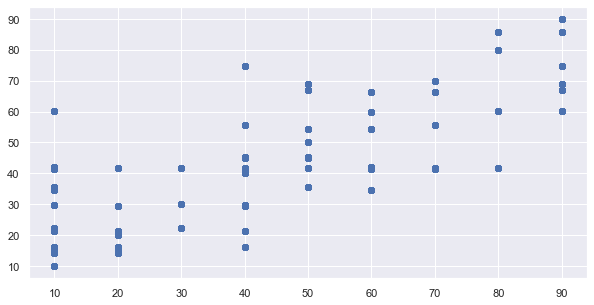

In [46]:
#Visualizing with scatter plot how well our model is doing
plt.scatter(y_test , y_preds)

In [47]:
#COMPARISON

In [49]:
#COMPARE METRICS
# Below are the metrics for different evaluation done on model

print("Decision Tree Model:")
baseline_metrics_tree = evaluate_preds(y_test , y_preds)
rs_metrics

compare_metrics = pd.DataFrame({
    'baseline decision tree':baseline_metrics_tree,})

print("........................................")
print("Linear Regression Model:")
print("R2 score: ",r2_lin*100,"%")
print("Mean Squared error: ",mse_lin)
print("Mean absoulte error: ",mae_lin)

Decision Tree Model:
R2 Score:75.881095%
Mean Squared Error:179.284066
Mean Absolute Error:8.154801
........................................
Linear Regression Model:
R2 score:  67.49799511907143 %
Mean Squared error:  176699172.45333818
Mean absoulte error:  10137.387511066627
